# KNN for classification and imputation

In this lab you'll practice using KNN for classification first, then explore how it can be used for effective variable imputation.

---

### 1. Load packages

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cross_validation import StratifiedKFold
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.neighbors import KNeighborsClassifier

In [42]:
import imp
plotter = imp.load_source('plotter', '../../knn_plotter.py')
from plotter import KNNBoundaryPlotter

---

### 3. Load datasets


In [3]:
affair = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Week 4 Notes & Code/Datasets/affair.csv')
churn = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Week 4 Notes & Code/Datasets/cell_phone_churn.csv')
coffee = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Week 4 Notes & Code/Datasets/dat12-coffee-preferences.csv')

---

### 4. Encode affairs vs. not in affair dataset 

This will be your binary target class variable.

In [8]:
affair['target'] = affair['nbaffairs'].map(lambda x: 0 if x == 0 else 1)
affair.head()
affair['target'].value_counts()

0    451
1    150
Name: target, dtype: int64

---

### 5. Clean and convert string variables

In [16]:
affair['child'] = affair['child'].map(lambda x: 0 if x == 'no' else 1)
affair['sex'] = affair['sex'].map(lambda x: 0 if x == 'male' else 1)
affair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 11 columns):
Unnamed: 0    601 non-null int64
sex           601 non-null int64
age           601 non-null float64
ym            601 non-null float64
child         601 non-null int64
religious     601 non-null int64
education     601 non-null int64
occupation    601 non-null int64
rate          601 non-null int64
nbaffairs     601 non-null int64
target        601 non-null int64
dtypes: float64(2), int64(9)
memory usage: 51.7 KB


---

### 6. Fit a `KNeighborsClassifier` with `weights='uniform'` and `n_neighbors=3`

You should choose **2 predictor variables** to predict had affair vs. not

In [34]:
x = affair[['child','sex','religious','education','rate']].values
y = affair['target'].values

knn_n3 = KNeighborsClassifier(n_neighbors=3,weights='uniform')

knn_n3.fit(x,y)
print 'Accuracy: ', knn_n3.score(x,y)

Accuracy:  0.763727121464


---

### 7. Cross-validate the classifier with `StratifiedKFold`



In [35]:
cv_indices = StratifiedKFold(y,n_folds=5)

scores = []

for train, test in cv_indices:
    x_train = x[train,:]
    x_test = x[test,:]
    y_train = y[train]
    y_test = y[test]
    
    knn_n3.fit(x_train,y_train)
    
    acc = knn_n3.score(x_test,y_test)
    scores.append(acc)
    print acc
    
print 'Accuracy :',np.mean(scores)

0.752066115702
0.691666666667
0.725
0.766666666667
0.708333333333
Accuracy : 0.728746556474


---

### 8. Do the same but with  `n_neighbors=11`

Use the same predictor variables and cv folds.

In [36]:
knn_n11 = KNeighborsClassifier(n_neighbors=11,weights='uniform')


scores = []

for train, test in cv_indices:
    x_train = x[train,:]
    x_test = x[test,:]
    y_train = y[train]
    y_test = y[test]
    
    knn_n11.fit(x_train,y_train)
    
    acc = knn_n11.score(x_test,y_test)
    scores.append(acc)
    print acc
    
print 'Accuracy :',np.mean(scores)

0.702479338843
0.725
0.775
0.8
0.741666666667
Accuracy : 0.748829201102


---

### 9. Cross-validate a model with  `n_neighbors=11` and `weights='distance'`

4    190
2    164
3    129
5     70
1     48
Name: religious, dtype: int64

---

### 10. [Optional] Explore the model visually with the `KNNBoundaryPlotter`

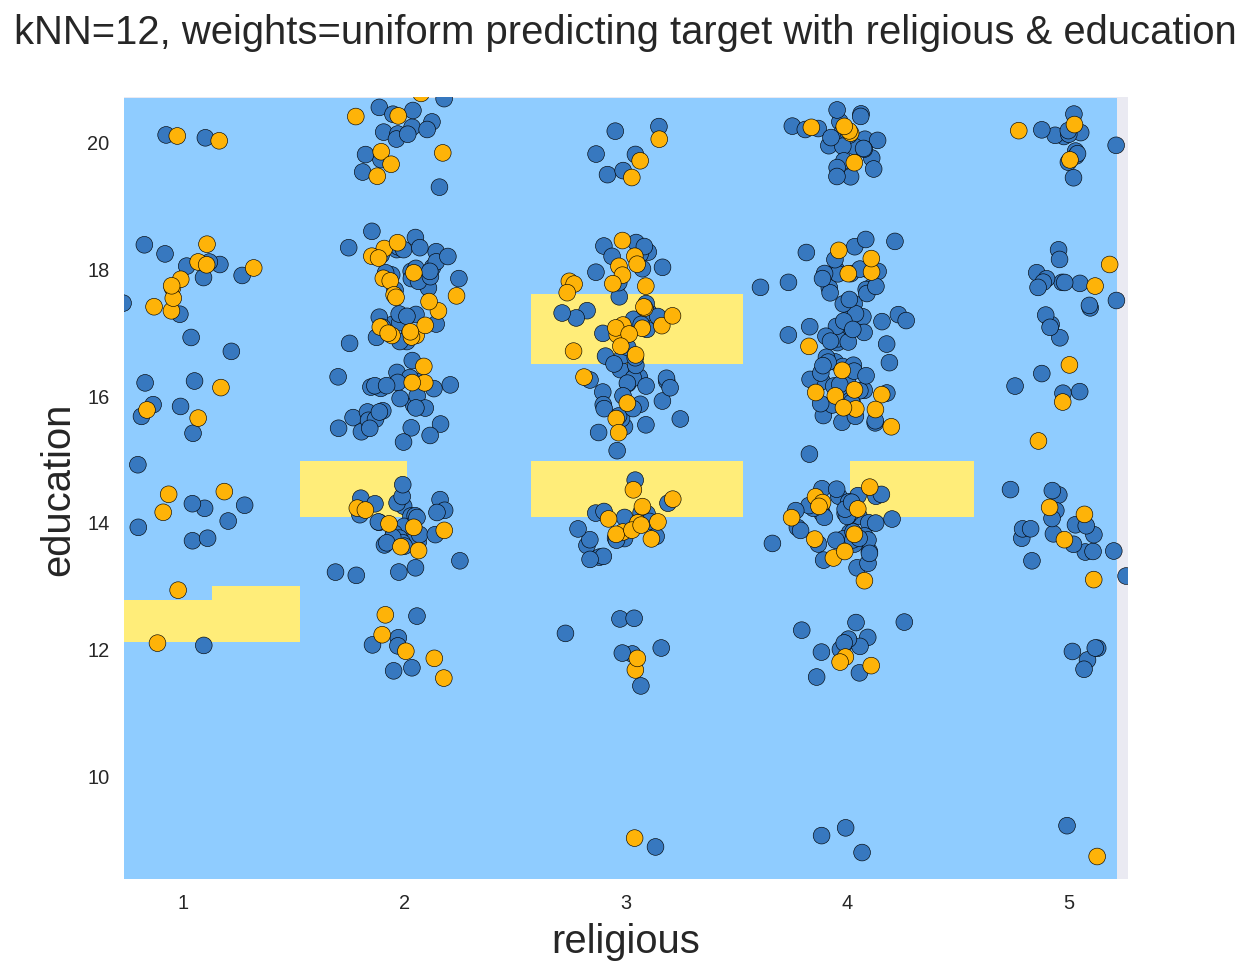

In [98]:
kbp = KNNBoundaryPlotter(affair, 'religious', 'education', 'target', nn_range=range(1,101))

kbp.knn_mesh_runner()

kbp.knn_interact()

In [80]:
churn['target'] = churn['churn'].map(lambda x: 0 if x == False else 1)
churn['intl_plan'] = churn['intl_plan'].map(lambda x: 0 if x == 'no' else 1)
churn['vmail_plan'] = churn['vmail_plan'].map(lambda x: 0 if x == 'no' else 1)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
intl_plan         3333 non-null int64
vmail_plan        3333 non-null int64
vmail_message     3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
churn             3333 non-null bool
target            3333 non-null int64
dtypes: bool(1), float64(8), int64(11), object(1)
memory usage: 524.1+ KB


---

### 11. With the churn dataset, find the optimal neighbors and weighting to predict churn using gridsearch

Show the cross-validated accuracy of the model.

In [84]:
from sklearn import grid_search, datasets
from sklearn.linear_model import LinearRegression

colvars = [x for x in churn if x not in ['state','churn','target']]
x = churn[colvars].values
y = churn['target'].values


# Setup our GridSearch Parmaters
search_parameters = {
    'n_neighbors':  range(1,50,2), 
    'weights':      ['uniform', 'distance']
}

# Intialize a blank model object
lm = KNeighborsClassifier()

# Initialize gridsearch
estimator = grid_search.GridSearchCV(lm, search_parameters, cv=10)

# Fit some data!
results = estimator.fit(x, y)

results.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

---

## Variable imputation with KNeighbors

You can actually do both classification _and_ regression with KNN. It is quite flexible due to its simplicity. One of it's most useful features is the ability to perform very nice imputation.

---

### 12. Look at the coffee data, count the missing values

In [87]:
coffee.isnull().sum()
missing = [x for x in coffee if x not in ['Timestamp','Name','Starbucks','PhilzCoffee']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
Timestamp           20 non-null object
Name                20 non-null object
Starbucks           20 non-null int64
PhilzCoffee         20 non-null int64
BlueBottleCoffee    14 non-null float64
PeetsTea            19 non-null float64
CaffeTrieste        8 non-null float64
GrandCoffee         5 non-null float64
RitualCoffee        13 non-null float64
FourBarrel          10 non-null float64
WorkshopCafe        12 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 1.8+ KB


---

### 13. For each of the missing columns, build a `KNeighborsClassifier` to predict rating for that column based on the other columns

Another great benefit of KNN is the ease with which it can do multi-class problems like this.

[Note: there is a more complicated way to do this, but I am doing it the simple way in the solutions.]

In [93]:
for col in missing:
    colvars = [x for x in coffee if x not in ['Timestamp','Name',col]]
    x = coffee[colvars].values
    y = coffee[col].values
    knn_n5 = KNeighborsClassifier(n_neighbors=5,weights='uniform')
    knn_n5.fit(x,y)
    print 'Accuracy: ', knn_n5.score(x,y)

[  4.   5.   5.   5.   4.   3.  nan  nan  nan   5.  nan   4.   4.   4.   4.
  nan   2.   3.   4.  nan]
[  3.   3.   5.   2.   2.   3.   5.   2.   3.   4.   3.   3.   2.   3.   3.
   3.   5.   2.   3.  nan]
[ nan  nan   3.  nan   4.   3.  nan  nan  nan   5.  nan   5.   2.  nan   2.
  nan  nan  nan   3.  nan]
[ nan  nan   2.  nan  nan   1.  nan  nan  nan   2.  nan  nan  nan  nan   2.
  nan  nan  nan   3.  nan]
[  5.   3.   1.   3.   4.  nan  nan  nan  nan   5.  nan  nan   5.  nan   4.
   4.   3.   4.   4.   4.]
[  5.  nan   1.   2.   4.  nan  nan  nan  nan   4.  nan  nan   4.  nan   3.
  nan   3.   3.   4.  nan]
[ nan   5.   1.   3.  nan   3.  nan   2.   4.   1.  nan  nan   3.   5.   2.
  nan   3.  nan   3.  nan]
